<a href="https://colab.research.google.com/github/amf599-cyber/N-Body_Test/blob/main/Test-Data-Analysis-v1-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv('/content/particle_accelerations_test.csv')
display(df.head())

,distance,acc_magnitude,pot_magnitude
0,0.000000,0.00000,0.00000
1,0.730840,1.87221,-1.87221
2,0.504386,3.93074,-3.93074
3,0.682751,2.14523,-2.14523
4,0.869115,1.32387,-1.32387


### Line Plot: Separation Distance vs. Acceleration

In [19]:
filtered_acc_df = df[(df['distance'] >= 0) & (df['distance'] <= 0.1)]
min_acc_in_range = filtered_acc_df['acc_magnitude'].min()
max_acc_in_range = filtered_acc_df['acc_magnitude'].max()

print(f"Min Acceleration Magnitude in range (0, 0.1): {min_acc_in_range:.4f}")
print(f"Max Acceleration Magnitude in range (0, 0.1): {max_acc_in_range:.4f}")

Min Acceleration Magnitude in range (0, 0.1): 0.0000
Max Acceleration Magnitude in range (0, 0.1): 1052.5000


/tmp/ipython-input-3192799814.py:49: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 1.5) # Zoom in on x-axis
/tmp/ipython-input-3192799814.py:51: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(min_acc_in_range * 0.9, max_acc_in_range * 1.1)


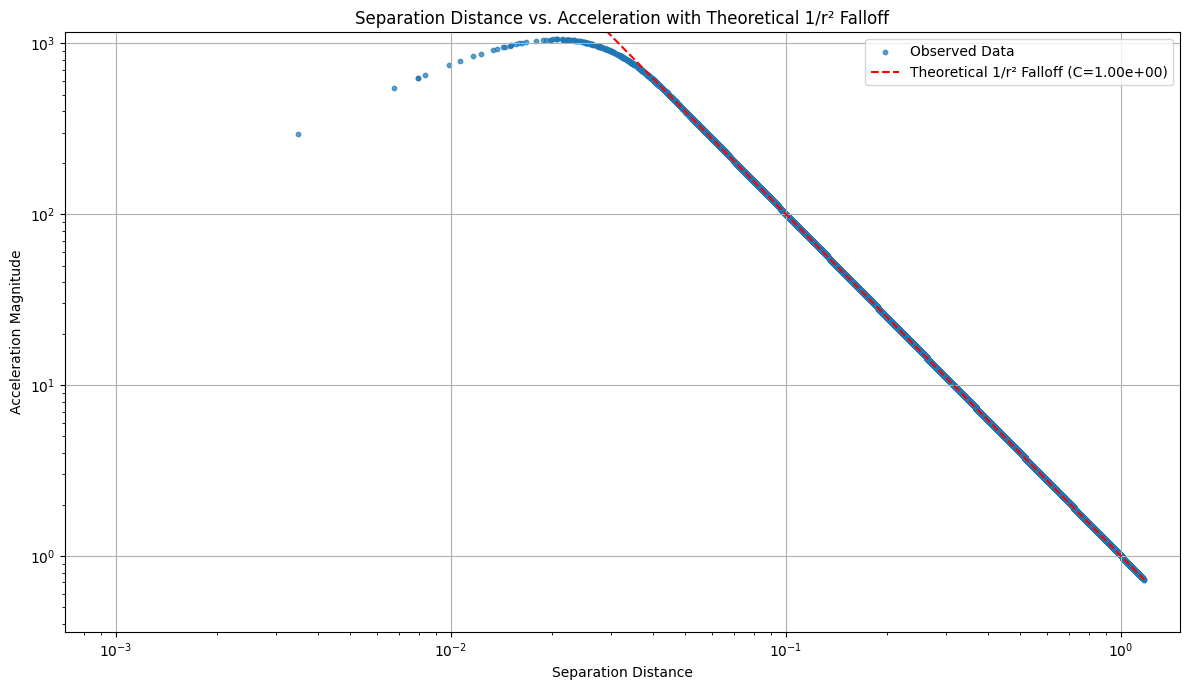

In [20]:
import numpy as np # Import numpy for numerical operations

plt.figure(figsize=(12, 7))
# sns.scatterplot(data=df, x='distance', y='acc_magnitude', label='Observed Data', s=10, alpha=0.7)

plt.scatter(df['distance'], df['acc_magnitude'], label='Observed Data', s=10, alpha=0.7)
plt.xscale('log')
plt.yscale('log')

# Calculate the constant C for the 1/r^2 falloff
# Find a reference point for calibration around distance = 0.1
calibration_band_min = 0.09
calibration_band_max = 0.11
calibration_points = df[(df['distance'] >= calibration_band_min) & (df['distance'] <= calibration_band_max)]

C = None
if not calibration_points.empty:
    # Use the mean acceleration magnitude in this range to set C
    # The reference distance for the 1/r^2 falloff is 2h = 0.1 as per the prompt.
    ref_distance_for_C = 0.1
    ref_acceleration_avg = calibration_points['acc_magnitude'].mean()
    C = ref_acceleration_avg * (ref_distance_for_C ** 2)
else:
    # Fallback: if no points exactly in the band, take the first point >= 0.1
    ref_df_filtered = df[df['distance'] >= 0.1]
    if not ref_df_filtered.empty:
        ref_point = ref_df_filtered.iloc[0]
        ref_distance_for_C = ref_point['distance'] # Use the actual distance of this point
        ref_acceleration_avg = ref_point['acc_magnitude']
        C = ref_acceleration_avg * (ref_distance_for_C ** 2)
    else:
        print("Warning: No data points found at or beyond distance 0.1 to calibrate the 1/r^2 falloff.")

if C is not None:
    # Generate x values for the analytical curve (from a small non-zero value to max distance)
    r_analytical = np.linspace(0.001, df['distance'].max(), 500)
    acc_analytical = C / (r_analytical ** 2)

    # Plot the analytical curve
    plt.plot(r_analytical, acc_analytical, color='red', linestyle='--', label=f'Theoretical 1/r² Falloff (C={C:.2e})') # Use scientific notation for C
else:
    print("Warning: Could not calculate C for the theoretical falloff. Theoretical curve will not be plotted.")

plt.title('Separation Distance vs. Acceleration with Theoretical 1/r² Falloff') # Updated title
plt.xlabel('Separation Distance')
plt.ylabel('Acceleration Magnitude') # Clarified label

# Adjust xlim to zoom between 0 and 0.1 and crop y-axis based on data
plt.xlim(0, 1.5) # Zoom in on x-axis
# Add a small buffer to min/max y-values for better visibility
plt.ylim(min_acc_in_range * 0.9, max_acc_in_range * 1.1)

plt.grid(True)
plt.legend() # Add legend
plt.tight_layout() # Adjust layout to prevent labels from being cut off
plt.show()

### Line Plot: Separation Distance vs. Potential

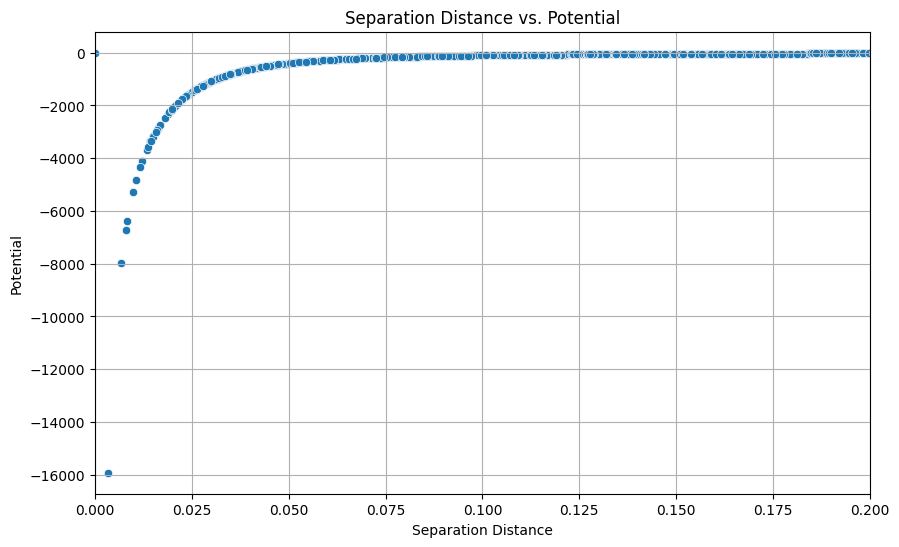

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='distance', y='pot_magnitude')
plt.title('Separation Distance vs. Potential')
plt.xlabel('Separation Distance')
plt.ylabel('Potential')
plt.xlim(0, 0.2) # Zoom in on the x-axis
plt.grid(True)
plt.show()

In [22]:
# Find the index of the maximum acceleration magnitude
max_acc_idx = df['acc_magnitude'].idxmax()
max_acceleration = df.loc[max_acc_idx, 'acc_magnitude']
distance_at_max_acc = df.loc[max_acc_idx, 'distance']

# Find the index of the maximum potential magnitude
max_pot_idx = df['pot_magnitude'].idxmin()
max_potential = df.loc[max_pot_idx, 'pot_magnitude']
distance_at_max_pot = df.loc[max_pot_idx, 'distance']

print(f"Maximum Acceleration Magnitude: {max_acceleration:.4f} at Separation Distance: {distance_at_max_acc:.4f}")
print(f"Maximum Potential Magnitude: {max_potential:.4f} at Separation Distance: {distance_at_max_pot:.4f}")

Maximum Acceleration Magnitude: 1052.5000 at Separation Distance: 0.0208
Maximum Potential Magnitude: -15927.7000 at Separation Distance: 0.0035


In [23]:
# Filter the DataFrame for separation distances between 0 and 0.1
filtered_df = df[(df['distance'] >= 0) & (df['distance'] <= 0.1)]

# Count the number of points in the filtered DataFrame
num_points = len(filtered_df)

print(f"Number of points with separation distance between 0 and 0.1: {num_points} out of 1,000,000.")


Number of points with separation distance between 0 and 0.1: 4108 out of 1,000,000.
